# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok 13</b>
1. Muhammad Faridz - 1301213480
2. Muhammad Alif Sirojuddin - 1301213420
3. Cakra Budiman Putra - 1301213273

#### Latar Belakang

Latar belakang eksperimen ini muncul dari kebutuhan untuk mengembangkan model klasifikasi sentimen yang dapat mengenali dan mengkategorikan sentimen positif dan negatif dalam ulasan produk atau layanan. Dataset yang digunakan diperoleh dari tiga sumber yang berbeda, yakni IMDb, Amazon, dan Yelp, dengan harapan dapat memberikan variasi dan mewakili berbagai jenis ulasan dan gaya penulisan.

Langkah-langkah eksperimen melibatkan pra-pemrosesan teks, termasuk case folding, penghapusan stopwords, dan stemming, untuk membersihkan data teks sebelum diolah oleh model. Pemilihan fitur dengan menggunakan uji chi-squared dilakukan untuk mengidentifikasi fitur-fitur yang paling informatif dalam klasifikasi sentimen. Tujuan akhirnya adalah mengembangkan model Random Forest yang dapat memprediksi sentimen secara akurat.

Evaluasi model dilakukan melalui matriks kebingungan, laporan klasifikasi, dan pengukuran akurasi. Selain itu, eksperimen juga mencoba menerapkan model pada teks baru yang dimasukkan oleh pengguna untuk memberikan gambaran praktis tentang potensial penerapan model pada data yang tidak dikenal. Melalui eksperimen ini, diharapkan dapat diperoleh pemahaman yang lebih baik tentang kinerja model klasifikasi sentimen terhadap ulasan produk dari berbagai sumber.

In [ ]:
# import library
import pandas as pd
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#import file
from google.colab import files

uploaded = files.upload()

In [ ]:
# Membaca file teks 'amazon_cells_labelled.txt' dan memuatnya ke dalam DataFrame menggunakan pandas
# File ini berisi data ulasan produk Amazon dengan label sentimen (0 untuk negatif, 1 untuk positif)
df = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None, names=['Review', 'Sentiment'])

In [ ]:
df.head()

,Review,Sentiment,clean_review
0,So there is no way for me to plug it in here i...,0,way plug us unless go convert
1,"Good case, Excellent value.",1,good case excellent valu
2,Great for the jawbone.,1,great jawbon
3,Tied to charger for conversations lasting more...,0,tied charger conversations lasting minutes maj...
4,The mic is great.,1,mic great


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1000 non-null   object
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.Sentiment.unique()

array([0, 1])

In [ ]:
# Fungsi untuk melakukan langkah case folding pada teks
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi huruf kecil (lower case)
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'#[A-Za-z0-9]+','', text)          # Menghapus hastag
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]',' ', text)                # Menghapus karakter tanda baca
  text = re.sub("\s\s+" , " ", text)                # Menggantikan multiple space dengan satu space
  text = text.strip()                               # Menghapus spasi di awal dan akhir teks
  return text


In [ ]:
# melakukan pengetesan
raw_sample = df['Review'].iloc[1]


case_folding = casefolding(raw_sample)


print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)


Raw data	:  Good case, Excellent value.
Case folding	:  good case excellent value


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english') # Sesuaikan dengan bahasa yang Anda gunakan

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Fungsi untuk menghapus stop words dari teks
def remove_stop_words(text):
  clean_words = []                            # Inisialisasi list untuk kata-kata bersih (tanpa stop words)
  tokens = word_tokenize(text)                # Tokenisasi teks menjadi kata-kata
  for word in tokens:
      if word not in stop_words:
          clean_words.append(word)
  return " ".join(clean_words)


In [ ]:
# melakukan pengetesan
raw_sample = df['Review'].iloc[149]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  After 3 months, screen just went black all of a sudden.
Case folding		:  after months screen just went black all of a sudden
Stopword removal	:  months screen went black sudden


In [ ]:
# Membuat objek stemmer menggunakan Porter Stemmer dari NLTK
stemmer = PorterStemmer()


In [ ]:
# Buat fungsi untuk langkah stemming bahasa inggris
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
# melakukan pengetesan
raw_sample = df['Review'].iloc[148]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Items stated as included from the description ARE NOT INCLUDED.
Case folding		:  items stated as included from the description are not included
Stopword removal	:  items stated included description included
Stemming		:  items stated included description includ


In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
df['clean_review'] = df['Review'].apply(text_preprocessing_process)

CPU times: user 320 ms, sys: 3.24 ms, total: 324 ms
Wall time: 673 ms


In [ ]:
# Exploration Data Analysis
# Write your code here
df


,Review,Sentiment,clean_review
0,So there is no way for me to plug it in here i...,0,way plug us unless go convert
1,"Good case, Excellent value.",1,good case excellent valu
2,Great for the jawbone.,1,great jawbon
3,Tied to charger for conversations lasting more...,0,tied charger conversations lasting minutes maj...
4,The mic is great.,1,mic great
...,...,...,...
995,The screen does get smudged easily because it ...,0,screen get smudged easily touches ear fac
996,What a piece of junk.. I lose more calls on th...,0,piece junk lose calls phon
997,Item Does Not Match Picture.,0,item match pictur
998,The only thing that disappoint me is the infra...,0,thing disappoint infra red port irda


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

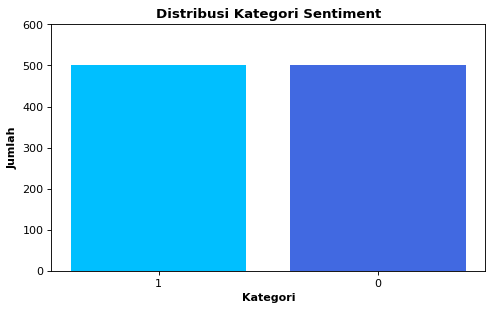

In [ ]:
#melakukan visualisasi kategori sentiment
height = df['Sentiment'].value_counts()
labels = (1, 0)
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori Sentiment', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

#### Ringkasan Metode
Metode yang diadopsi dalam eksperimen analisis sentimen ini melibatkan serangkaian langkah pra-pemrosesan teks untuk membersihkan dataset ulasan produk. Proses ini mencakup case folding, penghapusan stopwords, dan stemming untuk menghasilkan representasi teks yang lebih konsisten dan informatif. Setelah itu, dilakukan eksplorasi data dengan visualisasi distribusi sentimen positif dan negatif menggunakan diagram batang untuk memahami sebaran label sentimen dalam dataset.

Pada tahap baseline, sebuah model Random Forest Classifier dibangun sebagai pembanding. Proses ini melibatkan pemisahan data menjadi fitur dan target, serta pembagian data latih dan uji. Selanjutnya, ekstraksi fitur menggunakan vektorisasi TF-IDF diterapkan untuk mewakili teks ulasan, sementara pemilihan fitur dengan uji chi-squared digunakan untuk menentukan fitur-fitur yang paling berkontribusi terhadap sentimen.

Eksplorasi model mencakup beberapa skema dengan hyperparameter yang akan dicoba, termasuk eksplorasi tambahan pada vektorisasi TF-IDF dan pemilihan fitur dengan uji chi-squared. Evaluasi model dilakukan dengan mengukur akurasi menggunakan confusion matriks dan akurasi model. Selain itu, model diuji pada data baru yang dimasukkan oleh pengguna setelah melalui langkah pra-pemrosesan yang sama untuk memprediksi sentimen. Metode ini diharapkan dapat memberikan wawasan mendalam tentang pengaruh langkah-langkah pra-pemrosesan dan variasi model terhadap kinerja analisis sentimen pada ulasan produk.

In [ ]:
# memilih fitur

X = df['clean_review']
y = df['Sentiment']


In [ ]:
X

0                          way plug us unless go convert
1                               good case excellent valu
2                                           great jawbon
3      tied charger conversations lasting minutes maj...
4                                              mic great
                             ...                        
995            screen get smudged easily touches ear fac
996                           piece junk lose calls phon
997                                    item match pictur
998                 thing disappoint infra red port irda
999                         answer calls unit never work
Name: clean_review, Length: 1000, dtype: object

In [ ]:
y

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Sentiment, Length: 1000, dtype: int64

In [ ]:
# Membuat objek TfidfVectorizer dengan pengaturan ngram_range=(1,1)
tf_idf = TfidfVectorizer(ngram_range=(1,1))

# Melatih vektorizer pada data X
tf_idf.fit(X)


TfidfVectorizer()

In [ ]:
print(len(tf_idf.get_feature_names_out()))

1795


In [ ]:
print(tf_idf.get_feature_names_out())

['abhor' 'ability' 'able' ... 'yet' 'za' 'zero']


In [ ]:
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abhor,ability,able,abound,absolutel,absolutely,ac,accept,access,accessing,...,wow,wrong,wrongly,year,years,yell,yes,yet,za,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

In [ ]:
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
# Memilih sepuluh fitur dengan statistik chi-squared tertinggi
chi2_features = SelectKBest(chi2, k=1000)

# Mengaplikasikan transformasi pada data menggunakan fitur chi-squared yang dipilih
X_kbest_features = chi2_features.fit_transform(X, y)

# Menampilkan jumlah fitur asli dan jumlah fitur setelah reduksi
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])


Original feature number: 1795
Reduced feature number: 1000


In [ ]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.540892
1,0.751142
2,1.202637
3,0.588157
4,0.784089
...,...
1790,0.475118
1791,0.476929
1792,0.157366
1793,0.419838


In [ ]:
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.540892,abhor
1,0.751142,ability
2,1.202637,able
3,0.588157,abound
4,0.784089,absolutel
...,...,...
1790,0.475118,yell
1791,0.476929,yes
1792,0.157366,yet
1793,0.419838,za


In [ ]:
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
687,32.163937,great
1776,15.675517,works
681,12.594523,good
928,10.021107,love
415,9.731072,disappoint
...,...,...
1504,0.000102,static
1141,0.000034,phone
1237,0.000013,purpose
1392,0.000012,servic


In [ ]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ..., False,  True, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['abhor',
 'ability',
 'able',
 'abound',
 'absolutel',
 'absolutely',
 'accept',
 'accessory',
 'accessoryon',
 'accidentally',
 'accompanied',
 'activated',
 'ad',
 'adapter',
 'adapters',
 'add',
 'adhes',
 'ador',
 'adorable',
 'advise',
 'aggrav',
 'allot',
 'allowing',
 'alone',
 'along',
 'alot',
 'although',
 'amazed',
 'angeles',
 'angle',
 'anoth',
 'answ',
 'answer',
 'ant',
 'antena',
 'anyon',
 'anyth',
 'anything',
 'anywher',
 'apartment',
 'app',
 'apparently',
 'appears',
 'appointments',
 'area',
 'armband',
 'asia',
 'ask',
 'aspect',
 'assumed',
 'atleast',
 'att',
 'attractive',
 'authentic',
 'available',
 'average',
 'avoiding',
 'aw',
 'away',
 'awesom',
 'awesome',
 'awkward',
 'awsome',
 'back',
 'bad',
 'balance',
 'basically',
 'batteries',
 'beat',
 'beats',
 'beauti',
 'beautiful',
 'beep',
 'best',
 'better',
 'bewar',
 'beware',
 'big',
 'biggest',
 'bit',
 'blackberry',
 'blew',
 'blue',
 'blueant',
 'bluetoooth',
 'bluetooth',
 'booking',
 'boost',
 'b

In [ ]:
kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v

In [ ]:
kbest_feature

{'way': 1724,
 'plug': 1173,
 'unless': 1667,
 'convert': 331,
 'good': 681,
 'excellent': 530,
 'valu': 1692,
 'great': 687,
 'jawbon': 822,
 'tied': 1593,
 'charger': 239,
 'conversations': 330,
 'lasting': 859,
 'major': 940,
 'get': 664,
 'volum': 1705,
 'sending': 1384,
 'one': 1064,
 'on': 1063,
 'razr': 1260,
 'owner': 1097,
 'must': 1011,
 'needless': 1021,
 'wasted': 1721,
 'money': 993,
 'waste': 1720,
 'sound': 1478,
 'quality': 1243,
 'original': 1080,
 'extended': 550,
 'started': 1498,
 'headset': 714,
 'though': 1585,
 'design': 393,
 'odd': 1055,
 'comfort': 278,
 'highly': 724,
 'recommend': 1287,
 'blue': 145,
 'phon': 1140,
 'advise': 30,
 'fool': 619,
 'far': 573,
 'works': 1776,
 'place': 1152,
 'last': 857,
 'went': 1737,
 'website': 1729,
 'followed': 617,
 'directions': 410,
 'could': 339,
 'kindle': 845,
 'fire': 596,
 'absolutely': 5,
 'lov': 927,
 'commercials': 284,
 'mislead': 984,
 'run': 1346,
 'days': 374,
 'without': 1765,
 'charg': 236,
 'mother': 999,

In [ ]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abhor,ability,able,abound,absolutel,absolutely,accept,accessory,accessoryon,accidentally,...,worthless,worthwhil,worthwhile,wow,wrong,wrongly,years,yell,yes,za
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

In [ ]:
#import library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from joblib import dump


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=21)

In [ ]:

# Membuat objek RandomForestClassifier dengan random state
rfc = RandomForestClassifier(random_state=42)

# Mendefinisikan hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None],
    'min_samples_split': [20, 25, 30, 40, 50],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['log2', 'sqrt']
}

# Membuat objek GridSearchCV
model_terbaik = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy')

# Melakukan pencarian hyperparameter pada setiap model menggunakan data pelatihan
model_terbaik.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Parameter terbaik:", model_terbaik.best_params_)


Parameter terbaik: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 40, 'n_estimators': 100}


In [ ]:
dump(model_terbaik, filename='model_terbaik.joblib')

['model_terbaik.joblib']

In [ ]:
df_terbaik = pd.DataFrame(model_terbaik.cv_results_)
sort_terbaik = df_terbaik.sort_values(by='rank_test_score')

# Menampilkan hasil terbaik (lima teratas)
lima_model_terbaik = df_terbaik.head()

In [ ]:
lima_model_terbaik

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.640598,0.134464,0.051749,0.014190,entropy,None,log2,1,20,50,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.805243,0.752809,0.823308,0.793787,0.029900,15
1,0.744362,0.099116,0.052373,0.001563,entropy,None,log2,1,20,100,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.812734,0.779026,0.812030,0.801263,0.015727,9
2,1.197750,0.157996,0.078492,0.024579,entropy,None,log2,1,20,150,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.812734,0.764045,0.819549,0.798776,0.024716,13
3,0.444434,0.059768,0.037906,0.026325,entropy,None,log2,1,25,50,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.805243,0.749064,0.827068,0.793792,0.032858,14
4,0.955981,0.171070,0.069527,0.024326,entropy,None,log2,1,25,100,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.812734,0.775281,0.815789,0.801268,0.018418,8


In [ ]:
prediksi = model_terbaik.predict(X_test)

In [ ]:
prediksi_benar = (prediksi == y_test).sum()
prediksi_salah = (prediksi != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy= prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 167
Jumlah prediksi salah	: 33
Akurasi pengujian	: 83.5 %


In [ ]:

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        95
           1       0.94      0.73      0.82       105

    accuracy                           0.83       200
   macro avg       0.85      0.84      0.83       200
weighted avg       0.86      0.83      0.83       200



In [ ]:
cm = confusion_matrix(y_test, prediksi)
print('Confusion matrix:\n', cm)
# Mendapatkan nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN)
TP = cm[1, 1]  # Baris 1 (indeks 1) dan Kolom 1 (indeks 1) adalah True Positives
TN = cm[0, 0]  # Baris 0 (indeks 0) dan Kolom 0 (indeks 0) adalah True Negatives
FP = cm[0, 1]  # Baris 0 (indeks 0) dan Kolom 1 (indeks 1) adalah False Positives
FN = cm[1, 0]  # Baris 1 (indeks 1) dan Kolom 0 (indeks 0) adalah False Negatives

# Membuat DataFrame
data = {'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
        'Value': [TP, TN, FP, FN]}

df_confusion = pd.DataFrame(data)

Confusion matrix:
 [[90  5]
 [28 77]]


In [ ]:
df_confusion

,Metric,Value
0,True Positives (TP),77
1,True Negatives (TN),90
2,False Positives (FP),5
3,False Negatives (FN),28


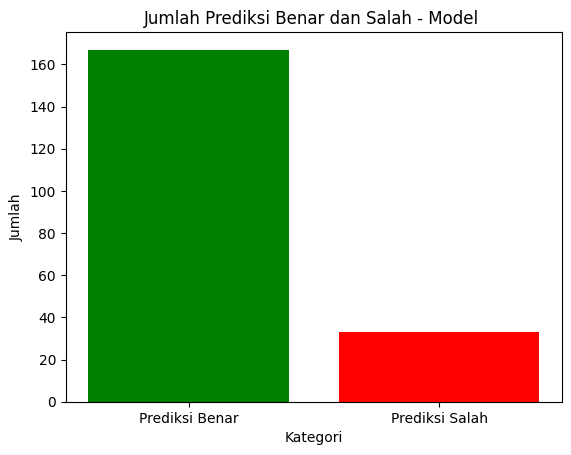

In [ ]:
labels = ['Prediksi Benar', 'Prediksi Salah']
values_rFc2 = [prediksi_benar, prediksi_salah]

# Plot batang
plt.bar(labels, values_rFc2, color=['green', 'red'])
plt.title('Jumlah Prediksi Benar dan Salah - Model ')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Model terbaik
prediksi_model = model_terbaik.predict(X_test)
report_model = classification_report(y_test, prediksi_model, output_dict=True)
evaluasi = pd.DataFrame({
    'Model': 'Model Terbaik ',
    'Akurasi': report_model['accuracy'] *100,
    'Presisi': report_model['weighted avg']['precision']*100,
    'Recall': report_model['weighted avg']['recall']*100,
    'F1-Score': report_model['weighted avg']['f1-score']*100,
    'Support': report_model['weighted avg']['support']
}, index=[0])


In [ ]:
evaluasi

,Model,Akurasi,Presisi,Recall,F1-Score,Support
0,Model Terbaik,83.5,85.527594,83.5,83.376139,200


In [ ]:
from joblib import load

# load model
model = load('model_terbaik.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [ ]:
#@title Masukkan Teks Anda:
input_text = "best" #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('Hasil Text Preprocessing :', pre_input_text)

if (result==0):
  sentiment = 'Negative'
else:
  sentiment = 'Positive'

print('Hasil prediksi', input_text, ' adalah\n', sentiment)

Hasil Text Preprocessing : best
Hasil prediksi best  adalah
 Positive


#### Hasil dan Analisis
Dalam hasil pencarian grid pada model RandomForestClassifier, konfigurasi hyperparameter terbaik adalah:

1. Criterion: 'entropy'
2. Max Depth: None (no maximum depth)
3. Max Features: 'log2'
4. Min Samples Leaf: 1
5. Min Samples Split: 40
6. Number of Estimators (Trees): 100


Analisis menunjukkan bahwa penggunaan Criterion 'entropy' dan ketidakbatasan Max Depth memberikan fleksibilitas pada model untuk menangkap kompleksitas dalam data. Penggunaan 'log2' sebagai Max Features dan 100 estimator mencerminkan strategi efektif untuk membangun model yang kuat tanpa overfitting. Dengan sampel daun minimum sebesar 1, model dapat membuat keputusan pada subset data yang kecil.

Dengan konfigurasi ini, diharapkan model dapat memberikan hasil optimal dan generalisasi yang baik pada data uji, serta dapat diterapkan dengan tingkat kepercayaan tinggi dalam situasi dunia nyata.


#### Kesimpulan
Secara keseluruhan,  menunjukkan kinerja yang baik dengan akurasi sebesar 83.5%. Presisi model, yang mengukur ketepatan prediksi positif, mencapai 85.53%, sedangkan recall, yang mengukur kemampuan model dalam menemukan kasus positif, mencapai 83.5%. F1-Score, yang memberikan keseimbangan antara presisi dan recall, mencapai 83.38%. Dengan Support sebanyak 200, kita memiliki pemahaman tentang distribusi kelas dalam dataset. Secara keseluruhan, model ini menunjukkan kemampuan yang baik dalam mengklasifikasikan data dengan baik.